# Ranking Charts

## Bar Charts

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [3]:
survived_df = titanic[titanic['survived'] == True]

In [4]:
names = survived_df['sex'].unique()
print(names)

['female' 'male']


In [5]:
values = survived_df['sex'].value_counts()
print(values)

female    233
male      109
Name: sex, dtype: int64


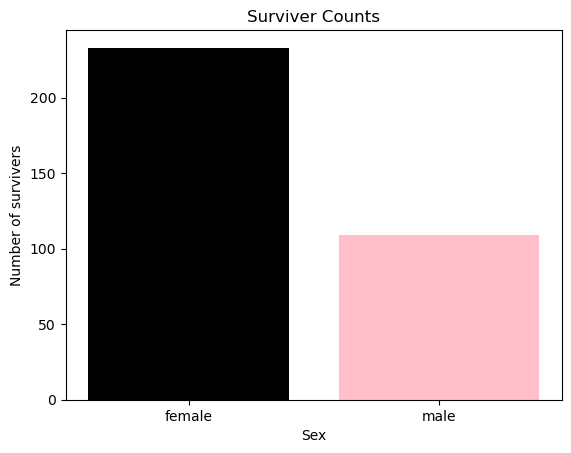

In [6]:
fig, ax = plt.subplots()
ax.bar(names, values, color=['black', 'pink'])
ax.set_xlabel('Sex')
ax.set_ylabel('Number of survivers')
ax.set_title('Surviver Counts')
plt.show()

In [7]:
survived = titanic.groupby('sex')['survived'].sum()
survived.head()

sex
female    233
male      109
Name: survived, dtype: int64

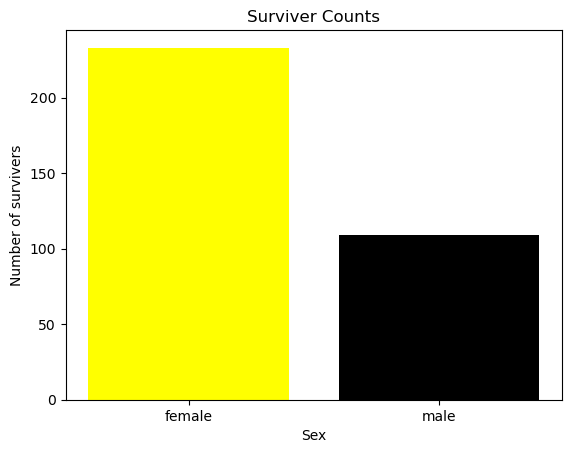

In [8]:
fig, ax = plt.subplots()
ax.bar(survived.index, survived.values, color=['yellow', 'black'])
ax.set_xlabel('Sex')
ax.set_ylabel('Number of survivers')
ax.set_title('Surviver Counts')
plt.show()

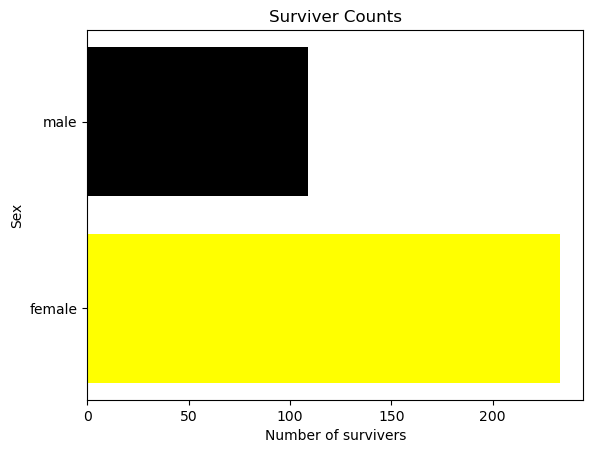

In [9]:
fig, ax = plt.subplots()
ax.barh(survived.index, survived.values, color=['yellow', 'black'])
ax.set_xlabel('Number of survivers')
ax.set_ylabel('Sex')
ax.set_title('Surviver Counts')
plt.show()

In [10]:
tips = sns.load_dataset('tips')
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


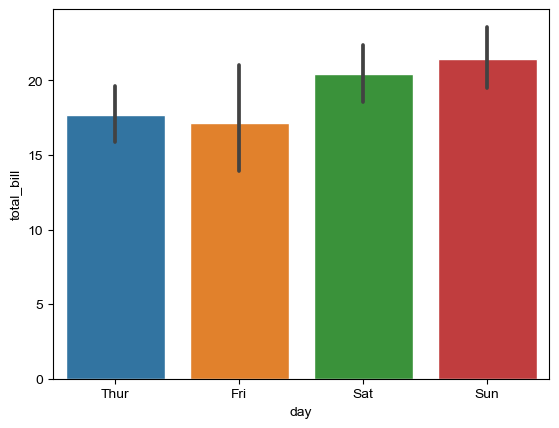

In [11]:
fig, ax = plt.subplots()
sns.set_style('whitegrid')
ax = sns.barplot(x='day', y='total_bill', data=tips, ax=ax)
plt.show()

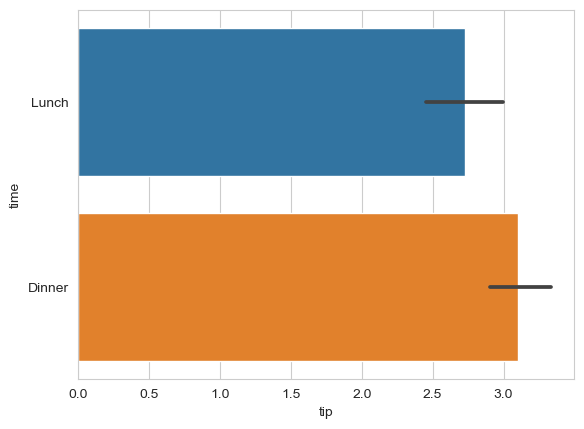

In [12]:
fig, ax = plt.subplots()
sns.barplot(x='tip', y='time', data=tips, ax=ax)
plt.show()

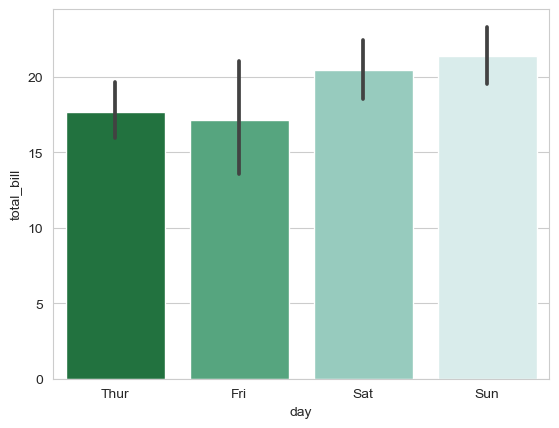

In [13]:
fig, ax = plt.subplots()
sns.set_style('whitegrid')
ax = sns.barplot(x='day', y='total_bill', palette='BuGn_r', data=tips, ax=ax)
plt.show()

## Grouped Bar Charts

In [14]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


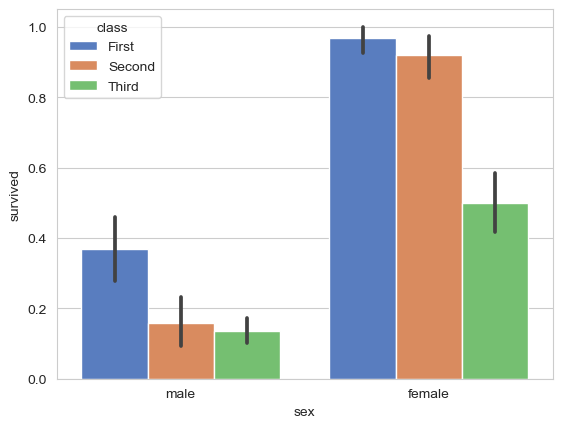

In [15]:
fig, ax = plt.subplots()
sns.barplot(x='sex', y='survived', hue='class', data=titanic, palette='muted', ax=ax)
plt.show()

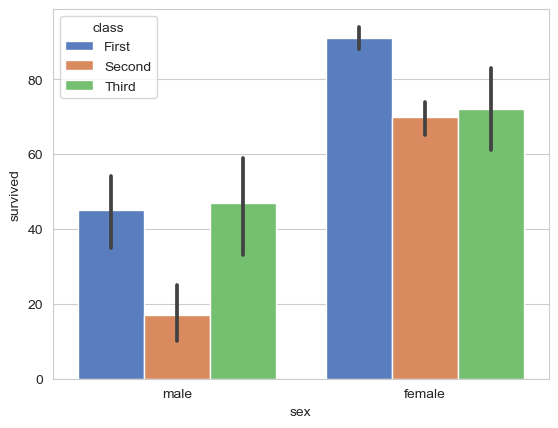

In [16]:
fig, ax = plt.subplots()
sns.barplot(x='sex', y='survived', hue='class', data=titanic, palette='muted', estimator=sum, ax=ax)
plt.show()

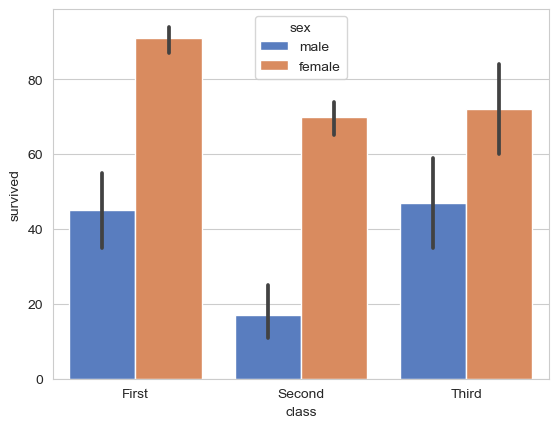

In [17]:
fig, ax = plt.subplots()
sns.barplot(x='class', y='survived', hue='sex', data=titanic, palette='muted', estimator=sum, ax=ax)
plt.show()

In [18]:
import pandas as pd

dic1 = {
    'Product': [
        'Apple', 'Banana', 'Beer', 'Juice',
        'Apple', 'Banana', 'Beer', 'Juice',
        'Apple', 'Banana', 'Beer', 'Juice'
    ],
    'Year': [
        2000, 2000, 2000, 2000,
        2001, 2001, 2001, 2001,
        2002, 2002, 2002, 2002
    ],
    'Revenue': [
        1, 3, 4, 5,
        2, 7, 6, 8,
        3, 6, 2, 9
    ]
}

df = pd.DataFrame(dic1)
df.head(20)

,Product,Year,Revenue
0,Apple,2000,1
1,Banana,2000,3
2,Beer,2000,4
3,Juice,2000,5
4,Apple,2001,2
5,Banana,2001,7
6,Beer,2001,6
7,Juice,2001,8
8,Apple,2002,3
9,Banana,2002,6


In [19]:
xsize = len(df['Year'].unique())
print(xsize)

3


In [20]:
import numpy as np

x = np.arange(xsize)
print(x)

[0 1 2]


In [21]:
bar_width = 0.15

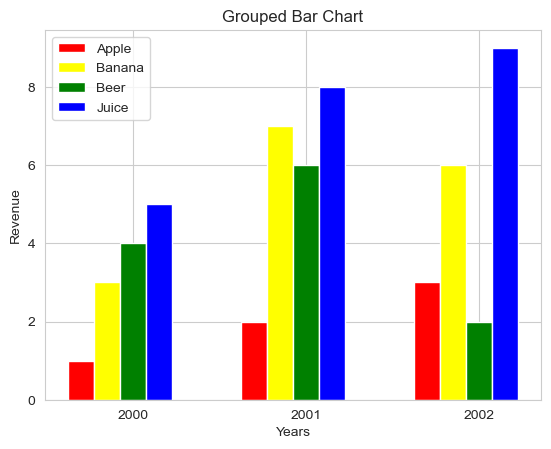

In [22]:
fig, ax = plt.subplots()
ax.bar(x, 'Revenue', width=bar_width, color='red', label='Apple', data=df[df['Product'] == 'Apple'])
ax.bar(x + bar_width, 'Revenue', width=bar_width, color='yellow', label='Banana', data=df[df['Product'] == 'Banana'])
ax.bar(x + (bar_width * 2), 'Revenue', width=bar_width, color='green', label='Beer', data=df[df['Product'] == 'Beer'])
ax.bar(x + (bar_width * 3), 'Revenue', width=bar_width, color='blue', label='Juice', data=df[df['Product'] == 'Juice'])

ax.set_xticks(x + (bar_width  * 2))
ax.set_xticklabels(['2000', '2001', '2002'])
ax.set_xlabel('Years')
ax.set_ylabel('Revenue')
ax.set_title('Grouped Bar Chart')
plt.legend()
plt.show()

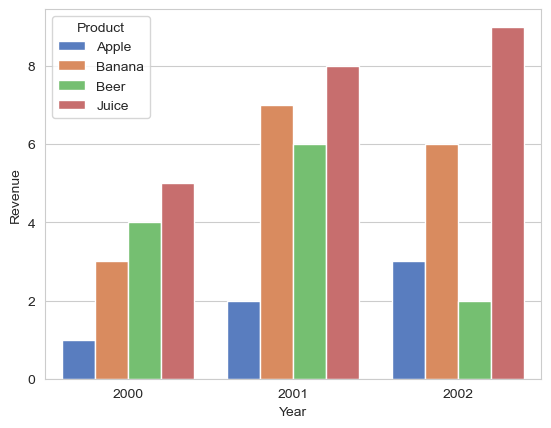

In [23]:
fig, ax = plt.subplots()
sns.barplot(x='Year', y='Revenue', hue='Product', data=df, palette='muted', estimator=sum, ax=ax)
plt.show()

## Lollipop Charts

In [24]:
dic1 = {
    'Product': [
        'Apple', 'Banana', 'Beer', 'Juice',
        'Cheese', 'Coffee', 'Red Wine', 'Hotdog'
    ],
    'Units': [
        255, 70, 211, 56,
        403, 45, 87, 123
    ]
}

df = pd.DataFrame(dic1)
df.head(10)

,Product,Units
0,Apple,255
1,Banana,70
2,Beer,211
3,Juice,56
4,Cheese,403
5,Coffee,45
6,Red Wine,87
7,Hotdog,123


C:\Users\jagma\AppData\Local\Temp\ipykernel_15056\3818201021.py:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markerline, stemlines, baseline) = ax.stem(df['Product'], df['Units'], use_line_collection=True)


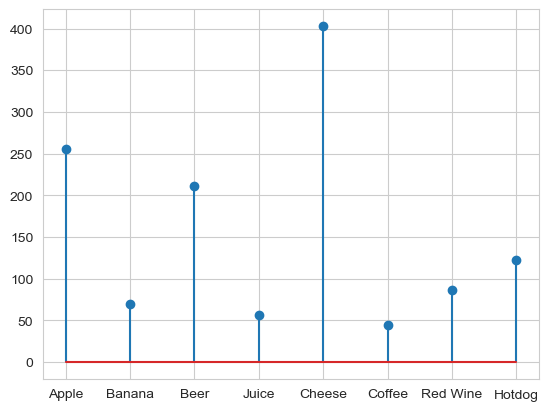

In [25]:
fig, ax = plt.subplots()
(markerline, stemlines, baseline) = ax.stem(df['Product'], df['Units'], use_line_collection=True)

C:\Users\jagma\AppData\Local\Temp\ipykernel_15056\1633221721.py:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markerline, stemlines, baseline) = ax.stem(df['Product'], df['Units'], use_line_collection=True)


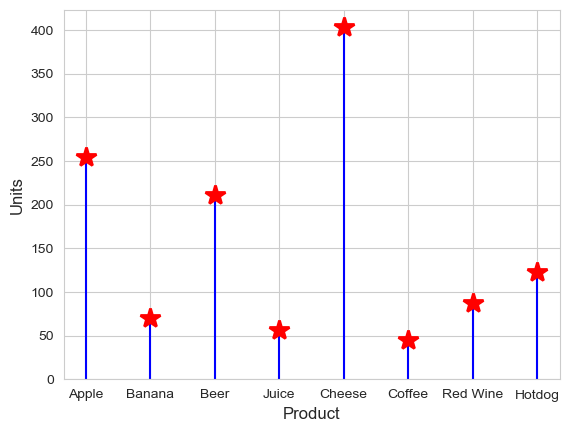

In [26]:
fig, ax = plt.subplots()
(markerline, stemlines, baseline) = ax.stem(df['Product'], df['Units'], use_line_collection=True)
markerline.set(marker='*', markersize=15, markeredgewidth=2, color='red')
stemlines.set(color='blue')
baseline.set(visible=False)

ax.set_xlabel('Product', size=12)
ax.set_ylabel('Units', size=12)
ax.set_ylim(bottom=0)
plt.show()

In [27]:
df2 = df.sort_values('Units', ascending=False)

C:\Users\jagma\AppData\Local\Temp\ipykernel_15056\2562890078.py:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markerline, stemlines, baseline) = ax.stem(df2['Product'], df2['Units'], use_line_collection=True)


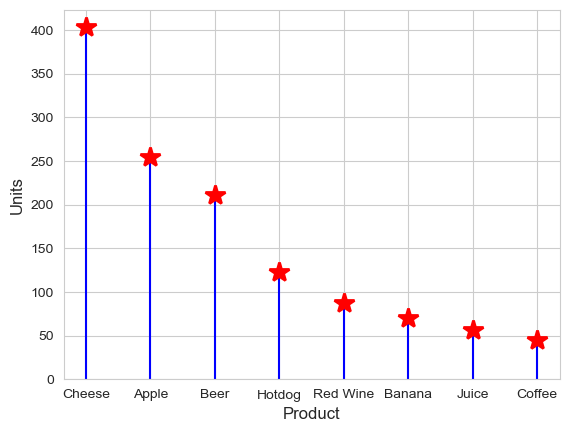

In [28]:
fig, ax = plt.subplots()
(markerline, stemlines, baseline) = ax.stem(df2['Product'], df2['Units'], use_line_collection=True)
markerline.set(marker='*', markersize=15, markeredgewidth=2, color='red')
stemlines.set(color='blue')
baseline.set(visible=False)

ax.set_xlabel('Product', size=12)
ax.set_ylabel('Units', size=12)
ax.set_ylim(bottom=0)
plt.show()

## Stacked Bar Charts

In [29]:
dic1 = {
    'Product': [
        'Apple', 'Banana', 'Beer',
        'Apple', 'Banana', 'Beer',
        'Apple', 'Banana', 'Beer'
    ],
    'Year': [
        2000, 2000, 2000,
        2001, 2001, 2001,
        2002, 2002, 2002
    ],
    'Revenue': [
        1, 3, 4,
        2, 7, 6,
        3, 6, 2
    ]
}

df = pd.DataFrame(dic1)
xsize = len(df['Year'].unique())
x = np.arange(xsize)
df.head(20)

,Product,Year,Revenue
0,Apple,2000,1
1,Banana,2000,3
2,Beer,2000,4
3,Apple,2001,2
4,Banana,2001,7
5,Beer,2001,6
6,Apple,2002,3
7,Banana,2002,6
8,Beer,2002,2


In [30]:
df1 = df[df['Product'] == 'Apple'].reset_index()
df2 = df[df['Product'] == 'Banana'].reset_index()
df3 = df[df['Product'] == 'Beer'].reset_index()

C:\Users\jagma\AppData\Local\Temp\ipykernel_15056\3918547911.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['2000', '2001', '2002'])


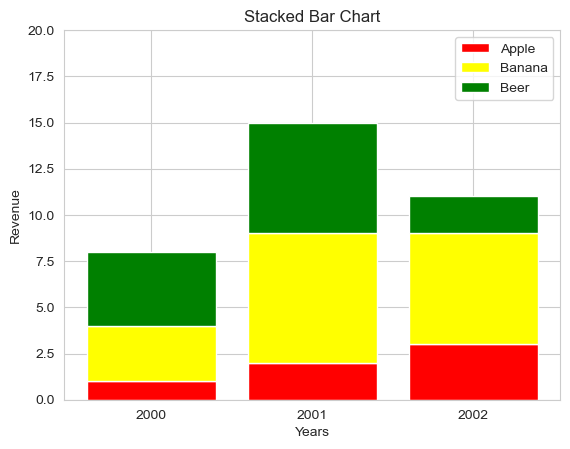

In [31]:
fig, ax = plt.subplots()
ax.bar(x, 'Revenue', color='red', label='Apple', data=df1)
ax.bar(x, 'Revenue', bottom=df1['Revenue'], color='yellow', label='Banana', data=df2)
ax.bar(x, 'Revenue', bottom=(df1['Revenue'] + df2['Revenue']), color='green', label='Beer', data=df3)

ax.set_xlabel('Years')
ax.set_ylabel('Revenue')
ax.set_title('Stacked Bar Chart')
ax.set_xticklabels(['2000', '2001', '2002'])
ax.set_xticks(x)
ax.set_ylim(0, 20)
ax.legend()

plt.show()

# Proportion Charts

## Pie Charts

In [32]:
slices = [100, 40, 20]
labels = ['Group A', 'Group B', 'Group C']
colours = ['red', 'yellow', 'pink']

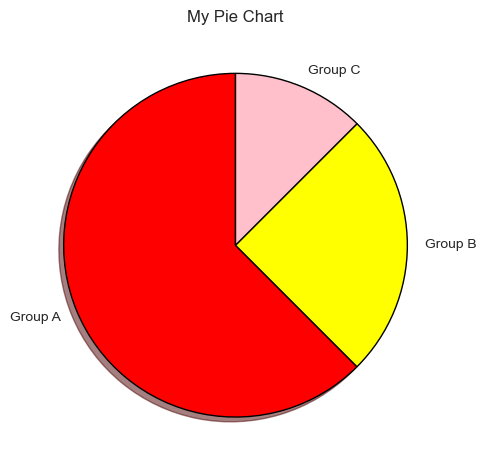

In [33]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots()
ax.set_title('My Pie Chart')
ax.pie(slices, labels=labels, wedgeprops={'edgecolor': 'black'}, colors=colours, shadow=True, startangle=90)
plt.tight_layout()
plt.show()

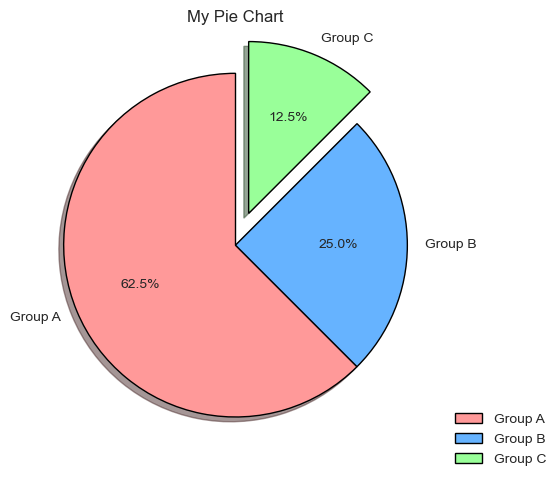

In [34]:
explode = [0, 0, 0.2]
colours_hex = ['#ff9999', '#66b3ff', '#99ff99']

plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots()
ax.set_title('My Pie Chart')
ax.pie(slices, labels=labels, wedgeprops={'edgecolor': 'black'}, colors=colours_hex, explode=explode, shadow=True, startangle=90, autopct='%1.1f%%')
fig.legend(loc='lower right')

plt.tight_layout()
plt.show()

## Treemap Charts

In [35]:
import squarify

In [36]:
dic1 = {
    'Product': [
        'Apple', 'Banana', 'Beer', 'Juice',
        'Cheese', 'Coffee', 'Red Wine', 'Hotdog'
    ],
    'Units': [
        255, 70, 211, 56, 
        403, 45, 87, 123
    ]
}

df = pd.DataFrame(dic1)
df.head(10)

,Product,Units
0,Apple,255
1,Banana,70
2,Beer,211
3,Juice,56
4,Cheese,403
5,Coffee,45
6,Red Wine,87
7,Hotdog,123


In [37]:
df.sort_values('Units', ascending=False, inplace=True)
df.head(10)

,Product,Units
4,Cheese,403
0,Apple,255
2,Beer,211
7,Hotdog,123
6,Red Wine,87
1,Banana,70
3,Juice,56
5,Coffee,45


In [38]:
colours = ['red', 'green', 'blue', 'yellow', 'pink', 'Coral', 'Magenta', 'violet']

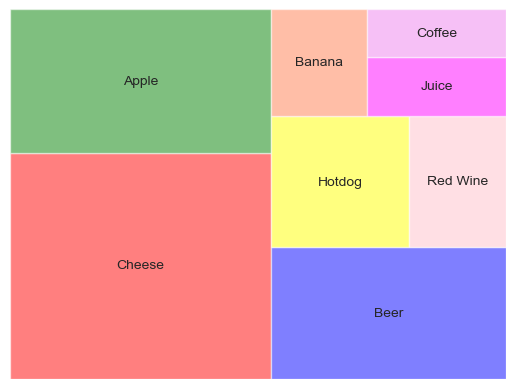

In [39]:
squarify.plot(sizes=df['Units'], label=df['Product'], color=colours, alpha=0.5)
plt.axis('off')
plt.show()

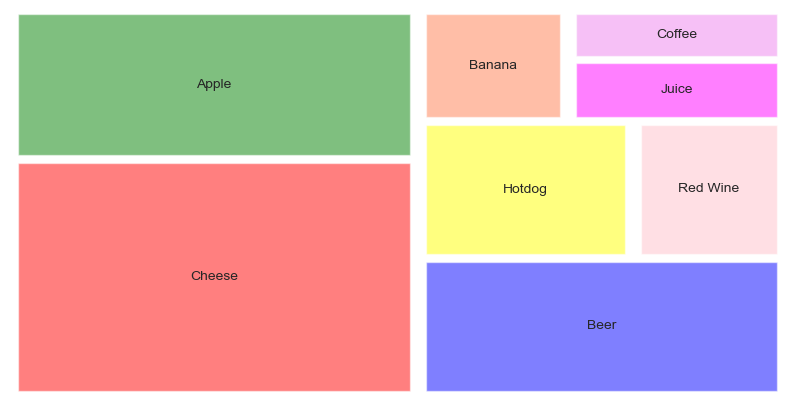

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
squarify.plot(sizes=df['Units'], label=df['Product'], color=colours, pad=True, alpha=0.5, ax=ax)
plt.axis('off')
plt.show()

# Optimising Colours

## Manually Picking Colours

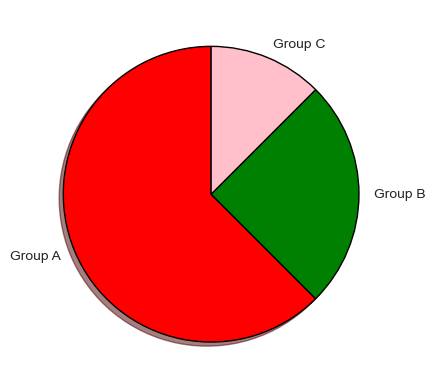

In [41]:
slices = [100, 40, 20]
labels = ['Group A', 'Group B', 'Group C']
colours = ['red', 'green', 'pink']

fig, ax = plt.subplots()
ax.pie(slices, labels=labels, wedgeprops={'edgecolor': 'black'}, colors=colours, shadow=True, startangle=90)
plt.show()

## Using Colourmaps

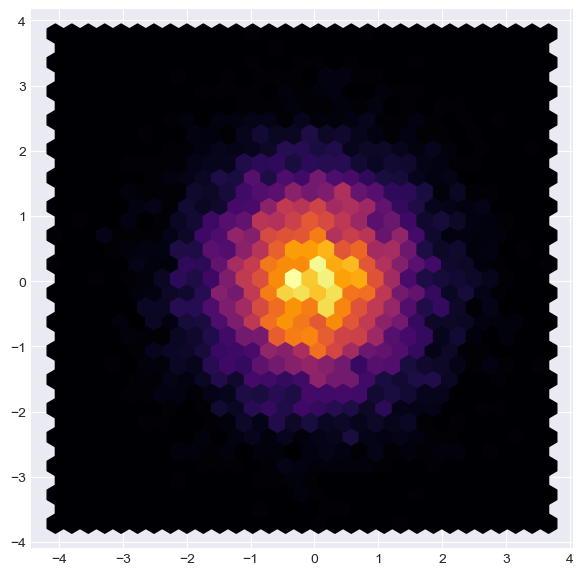

In [42]:
n = 10000
df = pd.DataFrame(
    {
        'x': np.random.randn(n),
        'y': np.random.randn(n)
    }
)

fig, ax = plt.subplots(figsize=(7, 7))
ax.hexbin('x', 'y', gridsize=30, cmap='inferno', data=df)
plt.show()

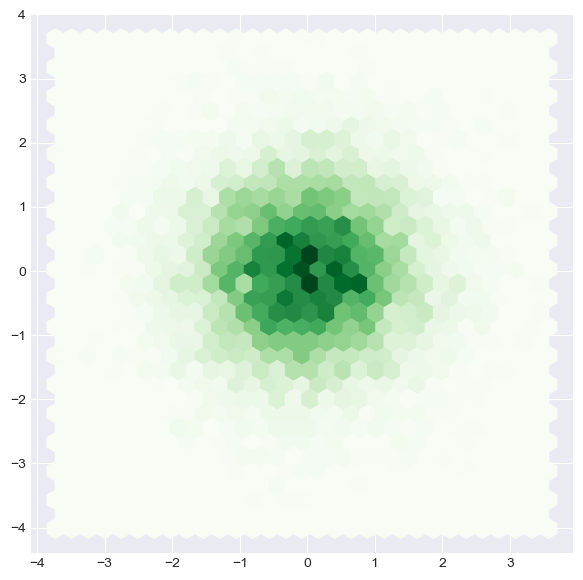

In [43]:
n = 10000
df = pd.DataFrame(
    {
        'x': np.random.randn(n),
        'y': np.random.randn(n)
    }
)

fig, ax = plt.subplots(figsize=(7, 7))
ax.hexbin('x', 'y', gridsize=30, cmap='Greens', data=df)
plt.show()

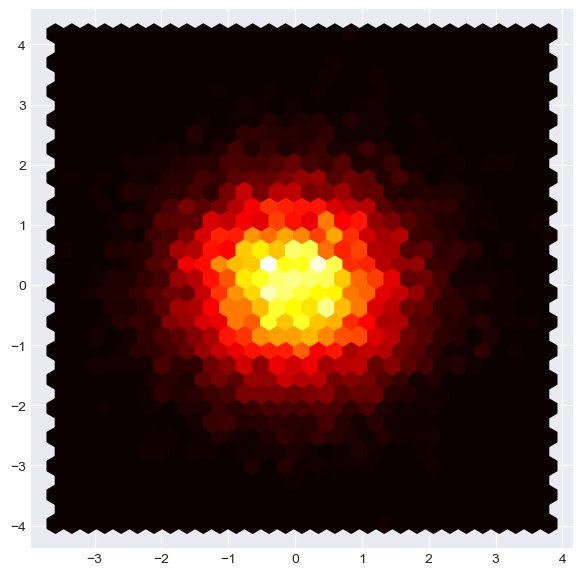

In [44]:
n = 10000
df = pd.DataFrame(
    {
        'x': np.random.randn(n),
        'y': np.random.randn(n)
    }
)

fig, ax = plt.subplots(figsize=(7, 7))
ax.hexbin('x', 'y', gridsize=30, cmap='hot', data=df)
plt.show()